# Property evaluation in Toronto

### Business Problem 
Toronto has seen a tremendous increase in property prices between 2014 - 2019, with eight neighbourhoods, in particular, increasing in value over 100%. These prices have been driven up by high demand. How could we find similar neighbourhoods invest?

This information would be benificial to those who are:
- Trying to find a neighbourhood which has simialr amenities to the expensive neighbourhoods but cannot afford the new prices
- Those who are looking to invest into Torontos property market

### Analytical Approach
Data from the Toronto Real Estate Board will be used to find neighbourhoods which have increased the most.

A way to show similarity is in the amenities present in the area. Amenity similarity can be determined by initially representing the neighbourhoods in a higher-dimensional space with their comparative amenity score as the axes. Similar neighbourhoods can thus be determined by simply finding which nodes have the shortest Euclidean distance to the high growth neighbourhoods.

### Data Collection

The eight fastest growing neighbourhoods in Toronto between 2014 and 2019:
1. West Hill and Centennial
2. Scarborough Village and Guildwood
3. Malvern and Rouge
4. Willowridge, Martingrove and Richview
5. BirchCliff
6. Yorkdale, Glen Park and Weston
7. Black Creek and York University Heights
8. Rexdale-Kipling and West Humber-Claireville

I would web scrape the top growing neighbourhoods and then combine it with the toronto amenity data from toronto_merged

In [136]:
import requests
import lxml.html as lh
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

The top results will be scraped from a real estate blog "Real Estate Toronto"

In [2]:
url='https://www.blogto.com/real-estate-toronto/2019/08/toronto-home-prices-neighbourhood/'
#Store the contents of the website under doc
doc = lh.fromstring(requests.get(url).content)
#Parse data that are stored between <tr>..</tr> of HTML
li_elements = doc.xpath('//ol')

In [3]:
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in li_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"West Hill and Centennial"
2:"Scarborough Village annd Guildwood"
3:"Malvern and Rouge"
4:"Willowridge, Martingrove and Richview"
5:"BirchCliff"
6:"Yorkdale, Glen Park and Weston"
7:"Black Creek and York University Heights"
8:"Rexdale-Kipling and West Humber-Claireville"


In [4]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(li_elements)):
    #T is our j'th row
    T=li_elements[j]
    
    #If row is not of size 10, the //tr data is not from our table 
    if len(T)!=length:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

Now to create a dataframe from the results and clean it

In [5]:
Dict=[title  for (title,column) in col]

df=pd.DataFrame(Dict)

In [6]:
prop = list(df[0])

In [7]:
prop

['West Hill and Centennial',
 'Scarborough Village annd Guildwood',
 'Malvern\xa0and Rouge',
 'Willowridge, Martingrove and Richview',
 'BirchCliff',
 'Yorkdale, Glen Park and Weston',
 'Black Creek and York University Heights',
 'Rexdale-Kipling and West Humber-Claireville']

In [8]:
prop1 = [w.replace('and',',') for w in prop]

In [9]:
prop1 = [w.replace('annd',',') for w in prop1]

In [10]:
prop1

['West Hill , Centennial',
 'Scarborough Village , Guildwood',
 'Malvern\xa0, Rouge',
 'Willowridge, Martingrove , Richview',
 'BirchCliff',
 'Yorkdale, Glen Park , Weston',
 'Black Creek , York University Heights',
 'Rexdale-Kipling , West Humber-Claireville']

In [11]:
prop1 = [w.replace('\xa0','') for w in prop1]

In [12]:
prop1 = [x.split(',') for x in prop1]

In [13]:
import itertools
prop1 = list(itertools.chain.from_iterable(prop1))

In [14]:
prop1

['West Hill ',
 ' Centennial',
 'Scarborough Village ',
 ' Guildwood',
 'Malvern',
 ' Rouge',
 'Willowridge',
 ' Martingrove ',
 ' Richview',
 'BirchCliff',
 'Yorkdale',
 ' Glen Park ',
 ' Weston',
 'Black Creek ',
 ' York University Heights',
 'Rexdale-Kipling ',
 ' West Humber-Claireville']

In [15]:
prop1 = [x.strip().rstrip() for x in prop1]

In [16]:
prop1

['West Hill',
 'Centennial',
 'Scarborough Village',
 'Guildwood',
 'Malvern',
 'Rouge',
 'Willowridge',
 'Martingrove',
 'Richview',
 'BirchCliff',
 'Yorkdale',
 'Glen Park',
 'Weston',
 'Black Creek',
 'York University Heights',
 'Rexdale-Kipling',
 'West Humber-Claireville']

Now to read the data toronto_merged.csv file of neighbourhood data into the dataframe toronto_merged

In [17]:
toronto_merged = pd.read_csv('toronto_merged.csv')

In [18]:
toronto_merged

,Unnamed: 0,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,M3A,North York,Parkwood,43.753259,-79.329656,1.0,Park,Food & Drink Shop,Department Store,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
1,1,M4A,North York,Victoria Villag,43.725882,-79.315572,0.0,Portuguese Restaurant,Coffee Shop,Pizza Place,Intersection,Hockey Arena,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Dog Run
2,2,M5A,Downtown Toronto,Harbourfron,43.654260,-79.360636,0.0,Coffee Shop,Bakery,Pub,Café,Park,Restaurant,Breakfast Spot,Mexican Restaurant,Yoga Studio,French Restaurant
3,3,M6A,North York,"Lawrence Height, Lawrence Mano",43.718518,-79.464763,0.0,Furniture / Home Store,Clothing Store,Accessories Store,Vietnamese Restaurant,Event Space,Miscellaneous Shop,Coffee Shop,Boutique,Electronics Store,Eastern European Restaurant
4,4,M7A,Downtown Toronto,Queen's Par,43.662301,-79.389494,0.0,Coffee Shop,Park,Gym,Yoga Studio,Bar,Portuguese Restaurant,Café,Diner,Beer Bar,Fast Food Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,M8X,Etobicoke,"The Kingswa, Montgomery Roa, Old Mill Nort",43.653654,-79.506944,1.0,Park,River,Deli / Bodega,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant
99,99,M4Y,Downtown Toronto,Church and Wellesle,43.665860,-79.383160,0.0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Pub,Café,Hotel,Mediterranean Restaurant,Men's Store
100,100,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Easter,43.662744,-79.321558,3.0,Park,Garden,Light Rail Station,Restaurant,Burrito Place,Auto Workshop,Fast Food Restaurant,Farmers Market,Spa,Recording Studio
101,101,M8Y,Etobicoke,"Humber Ba, King's Mill Par, Kingsway Park Sout...",43.636258,-79.498509,3.0,Home Service,Baseball Field,Yoga Studio,Donut Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Drugstore,Dessert Shop


We now need to create a new colum 'high_growth' and give it a value of 1 if the borogh contains one of the neighbourhoods listed in the article of high growth neighbourhoods

In [19]:
prop1

['West Hill',
 'Centennial',
 'Scarborough Village',
 'Guildwood',
 'Malvern',
 'Rouge',
 'Willowridge',
 'Martingrove',
 'Richview',
 'BirchCliff',
 'Yorkdale',
 'Glen Park',
 'Weston',
 'Black Creek',
 'York University Heights',
 'Rexdale-Kipling',
 'West Humber-Claireville']

In [20]:
import numpy as np
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    """ levenshtein_ratio_and_distance:
        Calculates levenshtein distance between two strings.
        If ratio_calc = True, the function computes the
        levenshtein distance ratio of similarity between two strings
        For all i and j, distance[i,j] will contain the Levenshtein
        distance between the first i characters of s and the
        first j characters of t
    """
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "The strings are {} edits away".format(distance[row][col])

In [21]:
num = 0
list_of_h= []
for x in toronto_merged['Neighborhood']:
    for xx in x.split(','):
        for y in prop1:
            if levenshtein_ratio_and_distance(xx.lower(),y.lower(),ratio_calc = True) >0.86:
                list_of_h.append(x)
                #Tronto_merged['high_growth'] = 1
                num +=1
                #print(toronto_merged['Neighborhood'])
                #print(toronto_merged[df[x]])
                print('got', num)
                print(levenshtein_ratio_and_distance(xx.lower(),y.lower()))
    else: toronto_merged['high_growth'] = 0

got 1
The strings are 1 edits away
got 2
The strings are 3 edits away
got 3
The strings are 1 edits away
got 4
The strings are 2 edits away
got 5
The strings are 1 edits away
got 6
The strings are 5 edits away
got 7
The strings are 2 edits away
got 8
The strings are 1 edits away


#### Add list to merged data frame
Creating new boolean column called 'high' to show whether the neighbourhood is within the list of growing neighbourhoods

In [22]:
toronto_merged['high'] = toronto_merged['Neighborhood'].map(lambda x: any(ele in x for ele in list_of_h)) # checking if string contains list element 
#res = any(ele in test_string for ele in test_list)

In [23]:
toronto_merged['high'].sum()

7

## Results of Data collection:
We now have a dataframe with the neighbourhoods in Toronto which have high growth neighbourhoods are outlined

In [24]:
url='https://toronto.listing.ca/real-estate-prices-by-community.htm'
#Store the contents of the website under doc
doc = lh.fromstring(requests.get(url).content)
#Parse data that are stored between <tr>..</tr> of HTML
li_elements = doc.xpath('//a')
#print(e.attrib['href'], elt.text_content())
for elt in t.xpath('//a'):
        print(elt.attrib['href'], elt.text_content())

/ 
/ Home
/toronto Best Of Toronto
/videos Videos
/events Events
/contests Contests
http://patios.blogto.com/ Patio Guide
/restaurants Restaurants
/real-estate-toronto/ Real Estate
mailto:editors@blogto.com?subject=Inaccurate Information about 8 neighbourhoods in Toronto have seen home prices double in the past 5 years&body=There is inaccurate content on this page:%0D%0A%0D%0Ahttps://www.blogto.com/real-estate-toronto/2019/08/toronto-home-prices-neighbourhood/ Report Inaccuracy
/real-estate-toronto/ Real Estate
mailto:editors@blogto.com?subject=Inaccurate Information about 8 neighbourhoods in Toronto have seen home prices double in the past 5 years&body=There is inaccurate content on this page:%0D%0A%0D%0Ahttps://www.blogto.com/real-estate-toronto/2019/08/toronto-home-prices-neighbourhood/ Report Inaccuracy
/contact/ contact us
https://www.blogto.com/real-estate-toronto/2019/06/toronto-home-prices-are-triple-what-average-millennial-can-afford/ hard to hear
https://www.zoocasa.com/blog/

In [25]:
len(li_elements)

307

In [26]:
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in li_elements[160:303]:
    i+=1
    name=t.text_content()
    html1 = t.attrib['href']
    
    html1 = 'https://toronto.listing.ca'+html1
    #tags = [tag.text_content() for tag in new_releases.xpath('.//div[@class="tab_item_top_tags"]')]
    #tags = [t.split(', ') for t in t]
    #html1 = t.href
    print ('%d:"%s"%s"'%(i,name,html1))
    col.append((name,html1))

1:"Agincourt South-Malvern West"https://toronto.listing.ca/agincourt-south-malvern-west/real-estate-price-history.htm"
2:"Alderwood"https://toronto.listing.ca/alderwood/real-estate-price-history.htm"
3:"Annex"https://toronto.listing.ca/annex/real-estate-price-history.htm"
4:"Banbury-Don Mills"https://toronto.listing.ca/banbury-don-mills/real-estate-price-history.htm"
5:"Bathurst Manor"https://toronto.listing.ca/bathurst-manor/real-estate-price-history.htm"
6:"Bay Street Corridor"https://toronto.listing.ca/bay-street-corridor/real-estate-price-history.htm"
7:"Bayview Village"https://toronto.listing.ca/bayview-village/real-estate-price-history.htm"
8:"Bayview Woods-Steeles"https://toronto.listing.ca/bayview-woods-steeles/real-estate-price-history.htm"
9:"Bedford Park-Nortown"https://toronto.listing.ca/bedford-park-nortown/real-estate-price-history.htm"
10:"Beechborough-Greenbrook"https://toronto.listing.ca/beechborough-greenbrook/real-estate-price-history.htm"
11:"Bendale"https://toronto

In [27]:
col

[('Agincourt South-Malvern West',
  'https://toronto.listing.ca/agincourt-south-malvern-west/real-estate-price-history.htm'),
 ('Alderwood',
  'https://toronto.listing.ca/alderwood/real-estate-price-history.htm'),
 ('Annex', 'https://toronto.listing.ca/annex/real-estate-price-history.htm'),
 ('Banbury-Don Mills',
  'https://toronto.listing.ca/banbury-don-mills/real-estate-price-history.htm'),
 ('Bathurst Manor',
  'https://toronto.listing.ca/bathurst-manor/real-estate-price-history.htm'),
 ('Bay Street Corridor',
  'https://toronto.listing.ca/bay-street-corridor/real-estate-price-history.htm'),
 ('Bayview Village',
  'https://toronto.listing.ca/bayview-village/real-estate-price-history.htm'),
 ('Bayview Woods-Steeles',
  'https://toronto.listing.ca/bayview-woods-steeles/real-estate-price-history.htm'),
 ('Bedford Park-Nortown',
  'https://toronto.listing.ca/bedford-park-nortown/real-estate-price-history.htm'),
 ('Beechborough-Greenbrook',
  'https://toronto.listing.ca/beechborough-gree

In [28]:

price=pd.DataFrame(col)

In [29]:
price

,0,1
0,Agincourt South-Malvern West,https://toronto.listing.ca/agincourt-south-mal...
1,Alderwood,https://toronto.listing.ca/alderwood/real-esta...
2,Annex,https://toronto.listing.ca/annex/real-estate-p...
3,Banbury-Don Mills,https://toronto.listing.ca/banbury-don-mills/r...
4,Bathurst Manor,https://toronto.listing.ca/bathurst-manor/real...
...,...,...
138,Wychwood,https://toronto.listing.ca/wychwood/real-estat...
139,Yonge-Eglinton,https://toronto.listing.ca/yonge-eglinton/real...
140,Yonge-St. Clair,https://toronto.listing.ca/yonge-st-clair/real...
141,York University Heights,https://toronto.listing.ca/york-university-hei...


## Example run through
using Alderwood as an example to demonstrate the process

1) Firstly I use the requests method to get the content of url links data

2) create a list of elements which have the tag 'tr' -> table data from webpage

3) Use the first 10 elements as they contain the change data in dollar and percentage terms
As im am not sure I may need both the percentage and dollar terms I decided to keep both for now

4) the data is quite messy with long blank spaces and the html new line tags and interactive carachrage return tags so these will need to be removed.

5) All details are to be placed on one line so they can be associated in a tabular format with one community. The data is thus placed into two different dataframes and then merged so that all rows are represented in one row. 

6) One row is converted to a list and appended to the larger list. Thus I have a two dimensional list which can be easily converted to a dataframe which it is.

7) The community name from price is this attached to the new dataframe under the column name 'community'

8) column names from the demonstration are saved as 'columns1' so they can be attached to the final one

In [30]:
price[0][1]

'Alderwood'

In [31]:
doc = lh.fromstring(requests.get(price[1][1]).content)
long_list=[]  
li_elements = doc.xpath('//tr')
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in li_elements[0:10]:
    i+=1
    name=t.text_content()
    #print ('%d:"%s"'%(i,name))
    col.append((name,[]))
list_of_lists = []

try1=pd.DataFrame(col)
try1[0] = [w.replace(' ','') for w in try1[0]]

try1[0] = [w.split('\r\n') for w in try1[0]]

try2=pd.DataFrame(try1[0])
for i in range(len(try2[0])):
   # print(i)
    print(try2[0][i])
    list_of_lists.append(try2[0][i][1:4])
   

try3 = pd.DataFrame(list_of_lists, columns=list_of_lists[0] )

try3 = try3.drop([0], axis = 0)

try4 = try3.T

try4.columns = try4.iloc[0,:]

try4

trydolla = try4.drop(['Period','%Change'], axis = 0).reset_index()

tryper = try4.drop(['Period','$Change'], axis = 0).reset_index()

df_long = pd.merge(trydolla, tryper, left_index=True, right_index=True)
df_long.reset_index()
print(df_long)
long_list.append(list(df_long.iloc[0,:]))
long_list

['', 'Period', '$Change', '%Change', '']
['', '1Day', '+$96', '+0.013%', '']
['', '7Days', '+$77', '+0.010%', '']
['', '30Days', '+$4,303', '+0.566%', '']
['', '3Months', '+$12.4k', '+1.65%', '']
['', '6Months', '+$19.9k', '+2.66%', '']
['', '1Year', '+$34.4k', '+4.71%', '']
['', '3Years', '+$121k', '+18.7%', '']
['', '5Years', '+$257k', '+50.6%', '']
['', '10Years', '+$421k', '+122%', '']
Period  index_x 1Day_x 7Days_x 30Days_x 3Months_x 6Months_x  1Year_x 3Years_x  \
0       $Change   +$96    +$77  +$4,303   +$12.4k   +$19.9k  +$34.4k   +$121k   

Period 5Years_x 10Years_x  index_y   1Day_y  7Days_y 30Days_y 3Months_y  \
0        +$257k    +$421k  %Change  +0.013%  +0.010%  +0.566%    +1.65%   

Period 6Months_y 1Year_y 3Years_y 5Years_y 10Years_y  
0         +2.66%  +4.71%   +18.7%   +50.6%     +122%  


[['$Change',
  '+$96',
  '+$77',
  '+$4,303',
  '+$12.4k',
  '+$19.9k',
  '+$34.4k',
  '+$121k',
  '+$257k',
  '+$421k',
  '%Change',
  '+0.013%',
  '+0.010%',
  '+0.566%',
  '+1.65%',
  '+2.66%',
  '+4.71%',
  '+18.7%',
  '+50.6%',
  '+122%']]

In [32]:
columns1 = list(df_long.columns)

## Now  to extract all data by running over list

In [33]:
long_list=[]
for x in price[1]:
    doc = lh.fromstring(requests.get(x).content)
    li_elements = doc.xpath('//tr')
    #Create empty list
    col=[]
    i=0
    #For each row, store each first element (header) and an empty list
    for t in li_elements[0:10]:
        i+=1
        name=t.text_content()
       
        col.append(name)
        
    #Cleaning the data, putting the price data into a database
    try1=pd.DataFrame(col)

    try1[0] = [w.replace(' ','') for w in try1[0]]

    try1[0] = [w.split('\r\n') for w in try1[0]]

    try2=pd.DataFrame(try1[0])

    list_of_lists = []
    for i in range(len(try2[0])):
        list_of_lists.append(try2[0][i][1:4])

    try3=pd.DataFrame(list_of_lists, columns=list_of_lists[0] )

    try3 = try3.drop([0], axis = 0)

    try4 = try3.T

    try4.columns = try4.iloc[0,:]

    trydolla = try4.drop(['Period','%Change'], axis = 0).reset_index()

    tryper = try4.drop(['Period','$Change'], axis = 0).reset_index()

    df_long = pd.merge(trydolla, tryper, left_index=True, right_index=True)
    df_long.reset_index()
    long_list.append(list(df_long.iloc[0,:]))
    print(long_list)

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%']]
[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%']]
[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

[['$Change', '+$95', '+$66', '+$4,213', '+$12.1k', '+$19.3k', '+$33.4k', '+$117k', '+$251k', '+$411k', '%Change', '+0.013%', '+0.009%', '+0.559%', '+1.63%', '+2.62%', '+4.62%', '+18.3%', '+49.7%', '+118%'], ['$Change', '+$96', '+$77', '+$4,303', '+$12.4k', '+$19.9k', '+$34.4k', '+$121k', '+$257k', '+$421k', '%Change', '+0.013%', '+0.010%', '+0.566%', '+1.65%', '+2.66%', '+4.71%', '+18.7%', '+50.6%', '+122%'], ['$Change', '+$227', '+$223', '+$10.4k', '+$29.9k', '+$48.2k', '+$84.0k', '+$294k', '+$621k', '+$1.02m', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$156', '+$154', '+$7,133', '+$20.6k', '+$33.2k', '+$57.8k', '+$202k', '+$427k', '+$699k', '%Change', '+0.013%', '+0.012%', '+0.577%', '+1.68%', '+2.74%', '+4.87%', '+19.4%', '+52.2%', '+128%'], ['$Change', '+$112', '+$85', '+$4,968', '+$14.3k', '+$22.9k', '+$39.6k', '+$139k', '+$297k', '+$485k', '%Change', '+0.013%', '+0.010%', '+0.563%', '+1.64%', '+2.65%', '+4

In [34]:
try_df = pd.DataFrame(long_list)

In [35]:
try_df 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,$Change,+$95,+$66,"+$4,213",+$12.1k,+$19.3k,+$33.4k,+$117k,+$251k,+$411k,%Change,+0.013%,+0.009%,+0.559%,+1.63%,+2.62%,+4.62%,+18.3%,+49.7%,+118%
1,$Change,+$96,+$77,"+$4,303",+$12.4k,+$19.9k,+$34.4k,+$121k,+$257k,+$421k,%Change,+0.013%,+0.010%,+0.566%,+1.65%,+2.66%,+4.71%,+18.7%,+50.6%,+122%
2,$Change,+$227,+$223,+$10.4k,+$29.9k,+$48.2k,+$84.0k,+$294k,+$621k,+$1.02m,%Change,+0.013%,+0.012%,+0.577%,+1.68%,+2.74%,+4.87%,+19.4%,+52.2%,+128%
3,$Change,+$156,+$154,"+$7,133",+$20.6k,+$33.2k,+$57.8k,+$202k,+$427k,+$699k,%Change,+0.013%,+0.012%,+0.577%,+1.68%,+2.74%,+4.87%,+19.4%,+52.2%,+128%
4,$Change,+$112,+$85,"+$4,968",+$14.3k,+$22.9k,+$39.6k,+$139k,+$297k,+$485k,%Change,+0.013%,+0.010%,+0.563%,+1.64%,+2.65%,+4.68%,+18.6%,+50.2%,+121%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,$Change,+$135,+$130,"+$6,155",+$17.8k,+$28.6k,+$49.8k,+$174k,+$368k,+$603k,%Change,+0.013%,+0.012%,+0.575%,+1.68%,+2.73%,+4.85%,+19.3%,+52.0%,+128%
139,$Change,+$170,+$108,"+$7,477",+$21.5k,+$34.3k,+$59.1k,+$208k,+$446k,+$729k,%Change,+0.013%,+0.008%,+0.555%,+1.61%,+2.60%,+4.57%,+18.1%,+49.2%,+117%
140,$Change,+$236,+$186,+$10.6k,+$30.4k,+$48.7k,+$84.4k,+$296k,+$631k,+$1.03m,%Change,+0.013%,+0.010%,+0.565%,+1.65%,+2.66%,+4.70%,+18.7%,+50.5%,+122%
141,$Change,+$83,+$51,"+$3,660",+$10.5k,+$16.7k,+$28.9k,+$102k,+$218k,+$357k,%Change,+0.013%,+0.008%,+0.554%,+1.61%,+2.59%,+4.55%,+18.1%,+49.0%,+116%


In [36]:
try_df.columns = columns1

In [37]:
try_df['community'] = price[0]

In [38]:
try_df.set_index(try_df['community'])

,index_x,1Day_x,7Days_x,30Days_x,3Months_x,6Months_x,1Year_x,3Years_x,5Years_x,10Years_x,...,1Day_y,7Days_y,30Days_y,3Months_y,6Months_y,1Year_y,3Years_y,5Years_y,10Years_y,community
community,,,,,,,,,,,,,,,,,,,,,
Agincourt South-Malvern West,$Change,+$95,+$66,"+$4,213",+$12.1k,+$19.3k,+$33.4k,+$117k,+$251k,+$411k,...,+0.013%,+0.009%,+0.559%,+1.63%,+2.62%,+4.62%,+18.3%,+49.7%,+118%,Agincourt South-Malvern West
Alderwood,$Change,+$96,+$77,"+$4,303",+$12.4k,+$19.9k,+$34.4k,+$121k,+$257k,+$421k,...,+0.013%,+0.010%,+0.566%,+1.65%,+2.66%,+4.71%,+18.7%,+50.6%,+122%,Alderwood
Annex,$Change,+$227,+$223,+$10.4k,+$29.9k,+$48.2k,+$84.0k,+$294k,+$621k,+$1.02m,...,+0.013%,+0.012%,+0.577%,+1.68%,+2.74%,+4.87%,+19.4%,+52.2%,+128%,Annex
Banbury-Don Mills,$Change,+$156,+$154,"+$7,133",+$20.6k,+$33.2k,+$57.8k,+$202k,+$427k,+$699k,...,+0.013%,+0.012%,+0.577%,+1.68%,+2.74%,+4.87%,+19.4%,+52.2%,+128%,Banbury-Don Mills
Bathurst Manor,$Change,+$112,+$85,"+$4,968",+$14.3k,+$22.9k,+$39.6k,+$139k,+$297k,+$485k,...,+0.013%,+0.010%,+0.563%,+1.64%,+2.65%,+4.68%,+18.6%,+50.2%,+121%,Bathurst Manor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,$Change,+$135,+$130,"+$6,155",+$17.8k,+$28.6k,+$49.8k,+$174k,+$368k,+$603k,...,+0.013%,+0.012%,+0.575%,+1.68%,+2.73%,+4.85%,+19.3%,+52.0%,+128%,Wychwood
Yonge-Eglinton,$Change,+$170,+$108,"+$7,477",+$21.5k,+$34.3k,+$59.1k,+$208k,+$446k,+$729k,...,+0.013%,+0.008%,+0.555%,+1.61%,+2.60%,+4.57%,+18.1%,+49.2%,+117%,Yonge-Eglinton
Yonge-St. Clair,$Change,+$236,+$186,+$10.6k,+$30.4k,+$48.7k,+$84.4k,+$296k,+$631k,+$1.03m,...,+0.013%,+0.010%,+0.565%,+1.65%,+2.66%,+4.70%,+18.7%,+50.5%,+122%,Yonge-St. Clair


In [39]:
price_com = try_df.copy()
#The data frame is now copied to a easier to understand name of price_com with com standing for community

In [40]:
test = price_com.copy()

In [41]:
test.set_index(test['community'], inplace = True)

In [42]:
test = test.drop(['The Islands'], axis = 0)

In [43]:
test

,index_x,1Day_x,7Days_x,30Days_x,3Months_x,6Months_x,1Year_x,3Years_x,5Years_x,10Years_x,...,1Day_y,7Days_y,30Days_y,3Months_y,6Months_y,1Year_y,3Years_y,5Years_y,10Years_y,community
community,,,,,,,,,,,,,,,,,,,,,
Agincourt South-Malvern West,$Change,+$95,+$66,"+$4,213",+$12.1k,+$19.3k,+$33.4k,+$117k,+$251k,+$411k,...,+0.013%,+0.009%,+0.559%,+1.63%,+2.62%,+4.62%,+18.3%,+49.7%,+118%,Agincourt South-Malvern West
Alderwood,$Change,+$96,+$77,"+$4,303",+$12.4k,+$19.9k,+$34.4k,+$121k,+$257k,+$421k,...,+0.013%,+0.010%,+0.566%,+1.65%,+2.66%,+4.71%,+18.7%,+50.6%,+122%,Alderwood
Annex,$Change,+$227,+$223,+$10.4k,+$29.9k,+$48.2k,+$84.0k,+$294k,+$621k,+$1.02m,...,+0.013%,+0.012%,+0.577%,+1.68%,+2.74%,+4.87%,+19.4%,+52.2%,+128%,Annex
Banbury-Don Mills,$Change,+$156,+$154,"+$7,133",+$20.6k,+$33.2k,+$57.8k,+$202k,+$427k,+$699k,...,+0.013%,+0.012%,+0.577%,+1.68%,+2.74%,+4.87%,+19.4%,+52.2%,+128%,Banbury-Don Mills
Bathurst Manor,$Change,+$112,+$85,"+$4,968",+$14.3k,+$22.9k,+$39.6k,+$139k,+$297k,+$485k,...,+0.013%,+0.010%,+0.563%,+1.64%,+2.65%,+4.68%,+18.6%,+50.2%,+121%,Bathurst Manor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,$Change,+$135,+$130,"+$6,155",+$17.8k,+$28.6k,+$49.8k,+$174k,+$368k,+$603k,...,+0.013%,+0.012%,+0.575%,+1.68%,+2.73%,+4.85%,+19.3%,+52.0%,+128%,Wychwood
Yonge-Eglinton,$Change,+$170,+$108,"+$7,477",+$21.5k,+$34.3k,+$59.1k,+$208k,+$446k,+$729k,...,+0.013%,+0.008%,+0.555%,+1.61%,+2.60%,+4.57%,+18.1%,+49.2%,+117%,Yonge-Eglinton
Yonge-St. Clair,$Change,+$236,+$186,+$10.6k,+$30.4k,+$48.7k,+$84.4k,+$296k,+$631k,+$1.03m,...,+0.013%,+0.010%,+0.565%,+1.65%,+2.66%,+4.70%,+18.7%,+50.5%,+122%,Yonge-St. Clair


In [44]:

for y in test.columns:
    if y in ['community','index','index_x','index_y']:
        pass
    else: 
        if y[-1] == 'x':
            print(y)
            for x in test['community']:
                if x == 'The Islands':
                    pass
            
                else:
                    test.loc[x,y] = test.loc[x,y][2:]
                    if test.loc[x,y][-1:] =='k':
                        #print(test.loc[x,y][-1:])
                        test.loc[x,y] = test.loc[x,y][:-1]#.replace('.',',') #+ '000'
                        #w.replace('.',',') for w in book_list
                        test.loc[x,y] = round(float(test.loc[x,y]))
                        test.loc[x,y] = str(test.loc[x,y]) + '000'
                        test.loc[x,y] = float(test.loc[x,y])
                    elif test.loc[x,y][-1:] =='m':
                        #print(test.loc[x,y][-1:])
                        test.loc[x,y] = test.loc[x,y][:-1]#.replace('.',',') #+ '000'
                        #w.replace('.',',') for w in book_list
                        test.loc[x,y] = round(float(test.loc[x,y]))
                        test.loc[x,y] = str(test.loc[x,y]) + '000000'
                        test.loc[x,y] = float(test.loc[x,y])
                    else:
                        try:
                            test.loc[x,y] = test.loc[x,y].replace(',','')
                            test.loc[x,y] = float(test.loc[x,y])
                        except ValueError:
                            print("Oops!  That was no valid number.  Try again...", test.loc[x,y], x , y )

1Day_x
7Days_x
30Days_x
3Months_x
6Months_x
1Year_x
3Years_x
5Years_x
10Years_x


In [45]:
import numpy as np

In [46]:
testy = test.copy()
for y in testy.columns:
    if y in ['community','index','index_x','index_y']:
        pass
    else: 
        if y[-1] == 'y':
            #print(y)
            for x in testy['community']:
                #print(x)
                testy.loc[x,y] = float(testy.loc[x,y][1:-1])
                   
                
                
                

In [47]:
testy

,index_x,1Day_x,7Days_x,30Days_x,3Months_x,6Months_x,1Year_x,3Years_x,5Years_x,10Years_x,...,1Day_y,7Days_y,30Days_y,3Months_y,6Months_y,1Year_y,3Years_y,5Years_y,10Years_y,community
community,,,,,,,,,,,,,,,,,,,,,
Agincourt South-Malvern West,$Change,95,66,4213,12000,19000,33000,117000,251000,411000,...,0.013,0.009,0.559,1.63,2.62,4.62,18.3,49.7,118,Agincourt South-Malvern West
Alderwood,$Change,96,77,4303,12000,20000,34000,121000,257000,421000,...,0.013,0.01,0.566,1.65,2.66,4.71,18.7,50.6,122,Alderwood
Annex,$Change,227,223,10000,30000,48000,84000,294000,621000,1e+06,...,0.013,0.012,0.577,1.68,2.74,4.87,19.4,52.2,128,Annex
Banbury-Don Mills,$Change,156,154,7133,21000,33000,58000,202000,427000,699000,...,0.013,0.012,0.577,1.68,2.74,4.87,19.4,52.2,128,Banbury-Don Mills
Bathurst Manor,$Change,112,85,4968,14000,23000,40000,139000,297000,485000,...,0.013,0.01,0.563,1.64,2.65,4.68,18.6,50.2,121,Bathurst Manor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,$Change,135,130,6155,18000,29000,50000,174000,368000,603000,...,0.013,0.012,0.575,1.68,2.73,4.85,19.3,52,128,Wychwood
Yonge-Eglinton,$Change,170,108,7477,22000,34000,59000,208000,446000,729000,...,0.013,0.008,0.555,1.61,2.6,4.57,18.1,49.2,117,Yonge-Eglinton
Yonge-St. Clair,$Change,236,186,11000,30000,49000,84000,296000,631000,1e+06,...,0.013,0.01,0.565,1.65,2.66,4.7,18.7,50.5,122,Yonge-St. Clair


In [48]:
testy['doller'] = ((testy['1Day_x'] * 5) + (testy['7Days_x']*4/7)+(testy['30Days_x']*3/30) + (testy['3Months_x']*2/90) + (testy['6Months_x']*2/180) + (testy['1Year_x']/360) + (testy['3Years_x']/(360*3)) + (testy['5Years_x']/(360*5)) +  (testy['10Years_x']/(360*10)))/9

In [49]:
testy['per_mo'] = ((testy['1Day_y'] * 10) + (testy['7Days_y']*4/7)+(testy['30Days_y']*3/30) + (testy['3Months_y']*2/90) + (testy['6Months_y']*2/180) + (testy['1Year_y']/360) + (testy['3Years_y']/(360*3)) + (testy['5Years_y']/(360*5)) +  (testy['10Years_y']/(360*10*2)))/9

In [108]:

list_of_houseprices = list(testy['10Years_x']/(testy['10Years_y']/100))
testy['HousePrice'] = list_of_houseprices

In [53]:
price_com=price_com.reset_index()

In [54]:
price_com = price_com.set_index(price_com['community'])

In [116]:
price_data = testy.copy()
tester = toronto_merged.copy()
tester = tester.set_index(tester['Neighborhood'])
tester['new'] = 'new'
tester['HousePrice'] = 'new'
tester['doller'] = 'new'
tester['per_mo'] = 'new'

In [99]:
price_data['HousePrice'] = list(price_data['HousePrice'])

In [127]:
price_data['HousePrice']

community
Agincourt South-Malvern West    348305.084746
Alderwood                       345081.967213
Annex                           781250.000000
Banbury-Don Mills               546093.750000
Bathurst Manor                  400826.446281
                                    ...      
Wychwood                        471093.750000
Yonge-Eglinton                  623076.923077
Yonge-St. Clair                 819672.131148
York University Heights         307758.620690
Yorkdale-Glen Park              352941.176471
Name: HousePrice, Length: 142, dtype: float64

In [129]:
tester

,Unnamed: 0,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,high_growth,high,new,HousePrice,doller,per_mo
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Parkwood,0,M3A,North York,Parkwood,43.753259,-79.329656,1.0,Park,Food & Drink Shop,Department Store,...,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,0,False,new,new,new,new
Victoria Villag,1,M4A,North York,Victoria Villag,43.725882,-79.315572,0.0,Portuguese Restaurant,Coffee Shop,Pizza Place,...,Dim Sum Restaurant,Diner,Discount Store,Dog Run,0,False,119,330252,199.484,0.0294873
Harbourfron,2,M5A,Downtown Toronto,Harbourfron,43.654260,-79.360636,0.0,Coffee Shop,Bakery,Pub,...,Breakfast Spot,Mexican Restaurant,Yoga Studio,French Restaurant,0,False,new,new,new,new
"Lawrence Height, Lawrence Mano",3,M6A,North York,"Lawrence Height, Lawrence Mano",43.718518,-79.464763,0.0,Furniture / Home Store,Clothing Store,Accessories Store,...,Coffee Shop,Boutique,Electronics Store,Eastern European Restaurant,0,False,new,new,new,new
Queen's Par,4,M7A,Downtown Toronto,Queen's Par,43.662301,-79.389494,0.0,Coffee Shop,Park,Gym,...,Café,Diner,Beer Bar,Fast Food Restaurant,0,False,new,new,new,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"The Kingswa, Montgomery Roa, Old Mill Nort",98,M8X,Etobicoke,"The Kingswa, Montgomery Roa, Old Mill Nort",43.653654,-79.506944,1.0,Park,River,Deli / Bodega,...,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,0,False,new,new,new,new
Church and Wellesle,99,M4Y,Downtown Toronto,Church and Wellesle,43.665860,-79.383160,0.0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,...,Café,Hotel,Mediterranean Restaurant,Men's Store,0,False,new,new,new,new
Business Reply Mail Processing Centre 969 Easter,100,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Easter,43.662744,-79.321558,3.0,Park,Garden,Light Rail Station,...,Fast Food Restaurant,Farmers Market,Spa,Recording Studio,0,False,new,new,new,new


In [118]:
num = 0
list_of_h= []
for x in tester['Neighborhood']:
    for xx in x.split(','):
        for y in price_com['community']:
            if levenshtein_ratio_and_distance(xx.lower(),y.lower(),ratio_calc = True) >0.75:
                try:
                    if tester.loc[x,'new'] == 'new':
                        tester.loc[x,'new'] = price_data.loc[y,'10Years_y']
                        
                    else:
                        total = tester.loc[x,'new'] + price_data.loc[y,'10Years_y']
                        tester.loc[x,'new'] = total/2
                        
                        
                   
                    
                except:
                    print('Not happening with this one: ',x, xx, y)
                    
                    
                    
              
                num +=1
                #print(toronto_merged['Neighborhood'])
                #print(toronto_merged[df[x]])
                print('got', num)
               # print(levenshtein_ratio_and_distance(xx.lower(),y.lower()))
    #else: pass #toronto_merged['high_growth'] = 0

got 1
got 2
got 3
got 4
got 5
got 6
got 7
got 8
got 9
got 10
got 11
got 12
got 13
got 14
got 15
got 16
got 17
got 18
got 19
got 20
got 21
got 22
got 23
got 24
got 25
got 26
got 27
got 28
got 29
got 30
got 31
got 32
got 33
got 34
got 35
got 36
got 37
got 38
got 39
got 40
got 41
got 42
got 43
got 44
got 45
got 46
got 47
got 48
got 49
got 50
got 51
got 52
got 53
got 54
got 55
got 56
got 57


In [122]:
num = 0
list_of_h= []
for x in tester['Neighborhood']:
    for xx in x.split(','):
        for y in price_com['community']:
            if levenshtein_ratio_and_distance(xx.lower(),y.lower(),ratio_calc = True) >0.75:
                try:
                    if tester.loc[x,'doller'] == 'new':
                        tester.loc[x,'doller'] = price_data.loc[y,'doller']
                        
                    else:
                        total = tester.loc[x,'doller'] + price_data.loc[y,'doller']
                        tester.loc[x,'doller'] = total/2
                        
                        
                   
                    
                except:
                    print('Not happening with this one: ',x, xx, y)
                    
                    
                    
              
                num +=1

In [120]:
num = 0
list_of_h= []
for x in tester['Neighborhood']:
    for xx in x.split(','):
        for y in price_com['community']:
            if levenshtein_ratio_and_distance(xx.lower(),y.lower(),ratio_calc = True) >0.75:
                try:
                    if tester.loc[x,'per_mo'] == 'new':
                        tester.loc[x,'per_mo'] = price_data.loc[y,'per_mo']
                        
                    else:
                        total = tester.loc[x,'per_mo'] + price_data.loc[y,'per_mo']
                        tester.loc[x,'per_mo'] = total/2
                        
                        
                   
                    
                except:
                    print('Not happening with this one: ',x, xx, y)
                    
                    
                    
              
                num +=1

In [128]:
num = 0
list_of_h= []
for x in tester['Neighborhood']:
    for xx in x.split(','):
        for y in price_com['community']:
            if levenshtein_ratio_and_distance(xx.lower(),y.lower(),ratio_calc = True) >0.75:
                try:
                    if tester.loc[x,'HousePrice'] == 'new':
                        tester.loc[x,'HousePrice'] = price_data.loc[y,'HousePrice']
                        
                    else:
                        total = tester.loc[x,'HousePrice'] + price_data.loc[y,'HousePrice']
                        tester.loc[x,'HousePrice'] = total/2
                        
                        
                   
                    
                except:
                    print('Not happening with this one: ',x, xx, y)
                    
                    
                    
              
                num +=1

In [130]:
limited_set = tester.copy()

In [58]:
toronto_merged['new'] = toronto_merged['Neighborhood'].map(lambda x: any(ele in x for ele in price_com['community'])) # checking if string contains list element 
#res = any(ele in test_string for ele in test_list)

In [59]:
tester[tester['new']!='new']

,Unnamed: 0,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,"(Alderwoo, Long Branc, per_mo)","(Cabbagetow, St. James Tow, HousePrice)","(Cabbagetow, St. James Tow, doller)","(Cabbagetow, St. James Tow, per_mo)","(Humber Ba, King's Mill Par, Kingsway Park South Eas, Mimico N, Old Mill Sout, The Queensway Eas, Royal York South Eas, Sunnyle, HousePrice)","(Humber Ba, King's Mill Par, Kingsway Park South Eas, Mimico N, Old Mill Sout, The Queensway Eas, Royal York South Eas, Sunnyle, doller)","(Humber Ba, King's Mill Par, Kingsway Park South Eas, Mimico N, Old Mill Sout, The Queensway Eas, Royal York South Eas, Sunnyle, per_mo)","(Kingsway Park South Wes, Mimico N, The Queensway Wes, Royal York South Wes, South of Bloo, HousePrice)","(Kingsway Park South Wes, Mimico N, The Queensway Wes, Royal York South Wes, South of Bloo, doller)","(Kingsway Park South Wes, Mimico N, The Queensway Wes, Royal York South Wes, South of Bloo, per_mo)"
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Parkwood,0,M3A,North York,Parkwood,43.753259,-79.329656,1.0,Park,Food & Drink Shop,Department Store,...,0.030467,562931.034483,330.843739,0.029108,474380.165289,291.123927,0.029784,474380.165289,291.123927,0.029784
Victoria Villag,1,M4A,North York,Victoria Villag,43.725882,-79.315572,0.0,Portuguese Restaurant,Coffee Shop,Pizza Place,...,0.030467,562931.034483,330.843739,0.029108,474380.165289,291.123927,0.029784,474380.165289,291.123927,0.029784
"Lawrence Height, Lawrence Mano",3,M6A,North York,"Lawrence Height, Lawrence Mano",43.718518,-79.464763,0.0,Furniture / Home Store,Clothing Store,Accessories Store,...,0.030467,562931.034483,330.843739,0.029108,474380.165289,291.123927,0.029784,474380.165289,291.123927,0.029784
"Roug, Malver",6,M1B,Scarborough,"Roug, Malver",43.806686,-79.194353,3.0,Fast Food Restaurant,Print Shop,Yoga Studio,...,0.030467,562931.034483,330.843739,0.029108,474380.165289,291.123927,0.029784,474380.165289,291.123927,0.029784
"Woodbine Garden, Parkview Hil",8,M4B,East York,"Woodbine Garden, Parkview Hil",43.706397,-79.309937,3.0,Pizza Place,Fast Food Restaurant,Gym / Fitness Center,...,0.030467,562931.034483,330.843739,0.029108,474380.165289,291.123927,0.029784,474380.165289,291.123927,0.029784
"Highland Cree, Rouge Hil, Port Unio",12,M1C,Scarborough,"Highland Cree, Rouge Hil, Port Unio",43.784535,-79.160497,0.0,Bar,Construction & Landscaping,Moving Target,...,0.030467,562931.034483,330.843739,0.029108,474380.165289,291.123927,0.029784,474380.165289,291.123927,0.029784
"Flemingdon Par, Don Mills Sout",13,M3C,North York,"Flemingdon Par, Don Mills Sout",43.725900,-79.340923,0.0,Gym,Coffee Shop,Beer Store,...,0.030467,562931.034483,330.843739,0.029108,474380.165289,291.123927,0.029784,474380.165289,291.123927,0.029784
St. James Tow,15,M5C,Downtown Toronto,St. James Tow,43.651494,-79.375418,0.0,Coffee Shop,Café,Restaurant,...,0.030467,562931.034483,330.843739,0.029108,474380.165289,291.123927,0.029784,474380.165289,291.123927,0.029784
Humewood-Cedarval,16,M6C,York,Humewood-Cedarval,43.693781,-79.428191,3.0,Trail,Field,Hockey Arena,...,0.030467,562931.034483,330.843739,0.029108,474380.165289,291.123927,0.029784,474380.165289,291.123927,0.029784


# Data exploration
we will use data exploration to find if the high growth neighbourhoods are located in a similar geographc area

In [60]:
#allow us to easily see where the high value clusters are
def red_blue(yes_no):
    if yes_no == True:
        return 'red'
    else: return 'blue'
    

In [153]:
def grouping(label):
    if label == 'Very Low':
        return 'blue'
    elif label == 'Low':
        return 'green'
    elif label == 'Moderate':
        return 'yellow'
    elif label ==  'High':
        return 'orange'
    else:
        return 'red'

In [62]:
import folium

In [63]:
import geocoder

In [64]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


In [65]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [66]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

In [68]:
# add markers to map
for lat, lng, borough, neighborhood, yes in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Borough'], toronto_merged['Neighborhood'],toronto_merged['high'],  ):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=red_blue(yes),
        fill=True,
        shape = 'star',
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto)  
    
map_toronto

In [131]:
new_df = limited_set[limited_set['new'] != 'new'] 

In [142]:
new_df[['new','HousePrice','doller','per_mo']].astype(float).corr()

,new,HousePrice,doller,per_mo
new,1.000000,0.415074,0.532764,0.998376
HousePrice,0.415074,1.000000,0.986639,0.416957
doller,0.532764,0.986639,1.000000,0.534301
per_mo,0.998376,0.416957,0.534301,1.000000


In [160]:
new_df.drop(['Neighborhood'], axis =1, inplace = True)

KeyError: "['Neighborhood'] not found in axis"

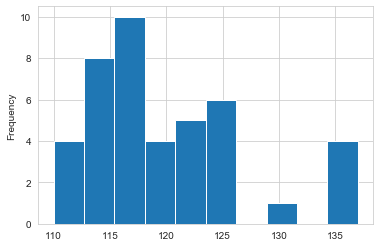

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

df = new_df.groupby(['Neighborhood','Latitude'])['new'].sum().reset_index()

new_df['new'].plot(kind='hist')

In [157]:
new_df = new_df.sort_values('new')
bins =  np.arange(0,10,200)
ind = np.digitize(new_df['new'],bins)
bin_labels_5 = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
new_df['label_Percentage10YearGrowth'] = pd.qcut(new_df['new'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
new_df.head()

,Unnamed: 0,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,HousePrice,doller,per_mo,label,label_10YearGrowth,Label_HousePrice,doller_value,Momentum_Growth,doller_Increase,label_Percentage10YearGrowth
Neighborhood,,,,,,,,,,,,,,,,,,,,,
"Clairle, Golden Mil, Oakridg",44,M1L,Scarborough,"Clairle, Golden Mil, Oakridg",43.711112,-79.284577,3.0,Bakery,Bus Line,Park,...,363636,203.826,0.0282965,Very Low Growth,Very Low Growth,Moderate,Moderate Increase,Very Low,Moderate,Very Low
Humber Summi,50,M9L,North York,Humber Summi,43.756303,-79.565963,3.0,Empanada Restaurant,Pizza Place,Shopping Mall,...,305405,172.128,0.02849,Very Low Growth,Very Low Growth,Low,Low Increase,Very Low,Low,Very Low
"Kingsway Park South Wes, Mimico N, The Queensway Wes, Royal York South Wes, South of Bloo",102,M8Z,Etobicoke,"Kingsway Park South Wes, Mimico N, The Queensw...",43.628841,-79.520999,3.0,Fast Food Restaurant,Hardware Store,Supplement Shop,...,564151,315.401,0.0285152,Very Low Growth,Very Low Growth,Very High,High Increase,Very Low,High,Very Low
Thorncliffe Par,29,M4H,East York,Thorncliffe Par,43.705369,-79.349372,0.0,Indian Restaurant,Yoga Studio,Bank,...,283036,161.461,0.0285515,Very Low Growth,Very Low Growth,Very Low,Very Low Increase,Very Low,Very Low,Very Low
Scarborough Villag,32,M1J,Scarborough,Scarborough Villag,43.744734,-79.239476,1.0,Playground,Yoga Studio,Donut Shop,...,311504,177.213,0.0287494,Very Low Growth,Very Low Growth,Low,Low Increase,Very Low,Low,Very Low


In [155]:
new_df = new_df.sort_values('HousePrice')
bins =  np.arange(0,10,200)
ind = np.digitize(new_df['HousePrice'],bins)
bin_labels_5 = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
new_df['Label_HousePrice'] = pd.qcut(new_df['HousePrice'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
new_df.head()

,Unnamed: 0,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,high,new,HousePrice,doller,per_mo,label,label_10YearGrowth,Label_HousePrice,doller_value,Momentum_Growth
Neighborhood,,,,,,,,,,,,,,,,,,,,,
"Roug, Malver",6,M1B,Scarborough,"Roug, Malver",43.806686,-79.194353,3.0,Fast Food Restaurant,Print Shop,Yoga Studio,...,True,115,253043,147.89,0.0289512,Very Low Growth,Very Low Growth,Very Low,Very Low Increase,Very Low
"East Birchmount Par, Ionvie, Kennedy Par",38,M1K,Scarborough,"East Birchmount Par, Ionvie, Kennedy Par",43.727929,-79.262029,0.0,Department Store,Hobby Shop,Coffee Shop,...,False,117.5,263835,157.517,0.0292975,Moderate Growth,Moderate Growth,Very Low,Very Low Increase,Moderate
"Flemingdon Par, Don Mills Sout",13,M3C,North York,"Flemingdon Par, Don Mills Sout",43.725900,-79.340923,0.0,Gym,Coffee Shop,Beer Store,...,False,117,272650,161.481,0.029233,Moderate Growth,Moderate Growth,Very Low,Very Low Increase,Moderate
"Del Ra, Keelesdal, Mount Denni, Silverthor",56,M6M,York,"Del Ra, Keelesdal, Mount Denni, Silverthor",43.691116,-79.476013,0.0,Skating Rink,Sandwich Place,Bar,...,False,115,275652,161.178,0.0289409,Very Low Growth,Very Low Growth,Very Low,Very Low Increase,Very Low
"Guildwoo, Morningsid, West Hil",18,M1E,Scarborough,"Guildwoo, Morningsid, West Hil",43.763573,-79.188711,3.0,Electronics Store,Breakfast Spot,Pizza Place,...,True,115.25,275982,160.941,0.0290652,Low Growth,Low Growth,Very Low,Very Low Increase,Low


In [156]:
new_df = new_df.sort_values('doller')
bins =  np.arange(0,10,200)
ind = np.digitize(new_df['doller'],bins)
bin_labels_5 = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
new_df['doller_Increase'] = pd.qcut(new_df['doller'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
new_df.head()

,Unnamed: 0,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,new,HousePrice,doller,per_mo,label,label_10YearGrowth,Label_HousePrice,doller_value,Momentum_Growth,doller_Increase
Neighborhood,,,,,,,,,,,,,,,,,,,,,
"Roug, Malver",6,M1B,Scarborough,"Roug, Malver",43.806686,-79.194353,3.0,Fast Food Restaurant,Print Shop,Yoga Studio,...,115,253043,147.89,0.0289512,Very Low Growth,Very Low Growth,Very Low,Very Low Increase,Very Low,Very Low
"East Birchmount Par, Ionvie, Kennedy Par",38,M1K,Scarborough,"East Birchmount Par, Ionvie, Kennedy Par",43.727929,-79.262029,0.0,Department Store,Hobby Shop,Coffee Shop,...,117.5,263835,157.517,0.0292975,Moderate Growth,Moderate Growth,Very Low,Very Low Increase,Moderate,Very Low
"Guildwoo, Morningsid, West Hil",18,M1E,Scarborough,"Guildwoo, Morningsid, West Hil",43.763573,-79.188711,3.0,Electronics Store,Breakfast Spot,Pizza Place,...,115.25,275982,160.941,0.0290652,Low Growth,Low Growth,Very Low,Very Low Increase,Low,Very Low
"Del Ra, Keelesdal, Mount Denni, Silverthor",56,M6M,York,"Del Ra, Keelesdal, Mount Denni, Silverthor",43.691116,-79.476013,0.0,Skating Rink,Sandwich Place,Bar,...,115,275652,161.178,0.0289409,Very Low Growth,Very Low Growth,Very Low,Very Low Increase,Very Low,Very Low
Thorncliffe Par,29,M4H,East York,Thorncliffe Par,43.705369,-79.349372,0.0,Indian Restaurant,Yoga Studio,Bank,...,112,283036,161.461,0.0285515,Very Low Growth,Very Low Growth,Very Low,Very Low Increase,Very Low,Very Low


In [152]:
new_df = new_df.sort_values('per_mo')
bins =  np.arange(0,10,200)
ind = np.digitize(new_df['per_mo'],bins)
bin_labels_5 = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
new_df['Momentum_Growth'] = pd.qcut(new_df['per_mo'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
new_df.head()

,Unnamed: 0,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,high,new,HousePrice,doller,per_mo,label,label_10YearGrowth,Label_HousePrice,doller_value,Momentum_Growth
Neighborhood,,,,,,,,,,,,,,,,,,,,,
"Clairle, Golden Mil, Oakridg",44,M1L,Scarborough,"Clairle, Golden Mil, Oakridg",43.711112,-79.284577,3.0,Bakery,Bus Line,Park,...,False,110,363636,203.826,0.0282965,Very Low Growth,Very Low Growth,Moderate Value,Moderate Increase,Very Low
Humber Summi,50,M9L,North York,Humber Summi,43.756303,-79.565963,3.0,Empanada Restaurant,Pizza Place,Shopping Mall,...,False,111,305405,172.128,0.02849,Very Low Growth,Very Low Growth,Low Value,Low Increase,Very Low
"Kingsway Park South Wes, Mimico N, The Queensway Wes, Royal York South Wes, South of Bloo",102,M8Z,Etobicoke,"Kingsway Park South Wes, Mimico N, The Queensw...",43.628841,-79.520999,3.0,Fast Food Restaurant,Hardware Store,Supplement Shop,...,False,111.5,564151,315.401,0.0285152,Very Low Growth,Very Low Growth,Very High Value,High Increase,Very Low
Thorncliffe Par,29,M4H,East York,Thorncliffe Par,43.705369,-79.349372,0.0,Indian Restaurant,Yoga Studio,Bank,...,False,112,283036,161.461,0.0285515,Very Low Growth,Very Low Growth,Very Low Value,Very Low Increase,Very Low
Scarborough Villag,32,M1J,Scarborough,Scarborough Villag,43.744734,-79.239476,1.0,Playground,Yoga Studio,Donut Shop,...,True,113,311504,177.213,0.0287494,Very Low Growth,Very Low Growth,Low Value,Low Increase,Very Low


In [163]:
# add markers to map
for lat, lng, borough, neighborhood, label1, houseP in zip(new_df['Latitude'], new_df['Longitude'], new_df['Borough'], new_df['Postcode'], new_df['label'], new_df['Label_HousePrice'] ):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=grouping(label1),
        fill=True,
        fill_color=grouping(houseP),
        fill_opacity=0.9).add_to(map_toronto)  
    
map_toronto

In [132]:
new_df[['HousePrice','per_mo','new']].corr()

""


In [168]:
new_df[new_df['new']=='new']

,Unnamed: 0,Postcode,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,...,HousePrice,doller,per_mo,label,label_10YearGrowth,Label_HousePrice,doller_value,Momentum_Growth,doller_Increase,label_Percentage10YearGrowth
Neighborhood,,,,,,,,,,,,,,,,,,,,,


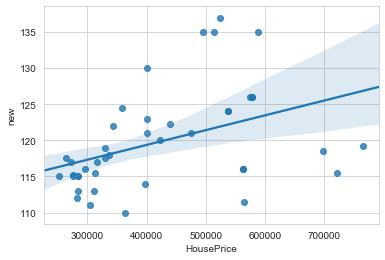

In [184]:
# Engine size as potential predictor variable of price
sns.regplot(x='HousePrice', y='new', data=new_df)
#plt.ylim(0,)

In [179]:
new_df['HousePrice'] = new_df['HousePrice'].astype(float)

In [186]:
new_df['10 Year Percentage Increase'] = new_df['new'].astype(float)

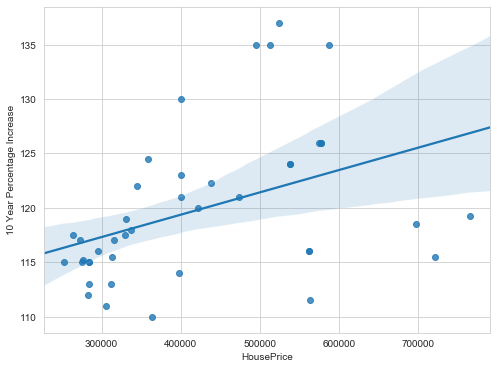

In [190]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x ='HousePrice', y='10 Year Percentage Increase', data=new_df)
#plt.ylim(0,)


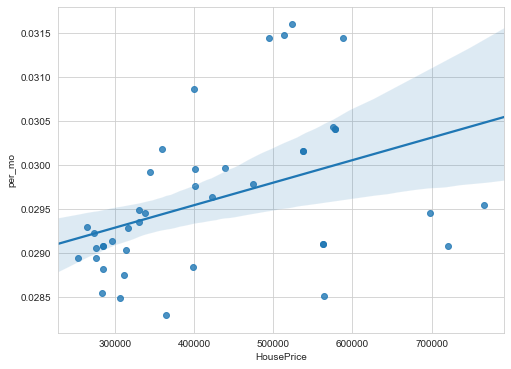

In [191]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x ='HousePrice', y='per_mo', data=new_df)

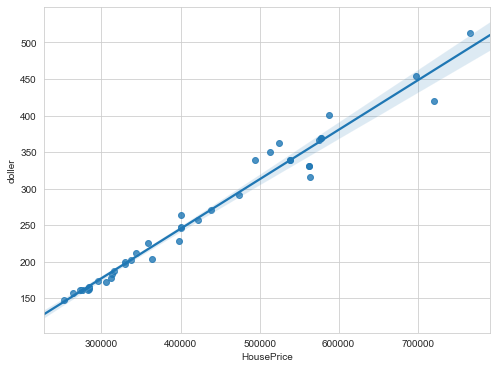

In [192]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x ='HousePrice', y='doller', data=new_df)

In [193]:
new_df.head()

,Unnamed: 0,Postcode,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,...,doller,per_mo,label,label_10YearGrowth,Label_HousePrice,doller_value,Momentum_Growth,doller_Increase,label_Percentage10YearGrowth,10 Year Percentage Increase
Neighborhood,,,,,,,,,,,,,,,,,,,,,
"Clairle, Golden Mil, Oakridg",44,M1L,Scarborough,43.711112,-79.284577,3.0,Bakery,Bus Line,Park,Intersection,...,203.826,0.0282965,Very Low Growth,Very Low Growth,Moderate,Moderate Increase,Very Low,Moderate,Very Low,110.0
Humber Summi,50,M9L,North York,43.756303,-79.565963,3.0,Empanada Restaurant,Pizza Place,Shopping Mall,Yoga Studio,...,172.128,0.02849,Very Low Growth,Very Low Growth,Low,Low Increase,Very Low,Low,Very Low,111.0
"Kingsway Park South Wes, Mimico N, The Queensway Wes, Royal York South Wes, South of Bloo",102,M8Z,Etobicoke,43.628841,-79.520999,3.0,Fast Food Restaurant,Hardware Store,Supplement Shop,Discount Store,...,315.401,0.0285152,Very Low Growth,Very Low Growth,Very High,High Increase,Very Low,High,Very Low,111.5
Thorncliffe Par,29,M4H,East York,43.705369,-79.349372,0.0,Indian Restaurant,Yoga Studio,Bank,Grocery Store,...,161.461,0.0285515,Very Low Growth,Very Low Growth,Very Low,Very Low Increase,Very Low,Very Low,Very Low,112.0
Scarborough Villag,32,M1J,Scarborough,43.744734,-79.239476,1.0,Playground,Yoga Studio,Donut Shop,Dessert Shop,...,177.213,0.0287494,Very Low Growth,Very Low Growth,Low,Low Increase,Very Low,Low,Very Low,113.0


In [215]:
new_df.groupby(['Momentum_Growth'])[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','5th Most Common Venue']].agg(pd.Series.mode)

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,5th Most Common Venue
Momentum_Growth,,,,
Very Low,Fast Food Restaurant,Yoga Studio,Yoga Studio,Dim Sum Restaurant
Low,Coffee Shop,"[Breakfast Spot, Café, Chinese Restaurant, Con...","[Bus Line, Coffee Shop, Department Store, Even...","[Bakery, Clothing Store, Comfort Food Restaura..."
Moderate,"[Bar, Chinese Restaurant, Department Store, Gy...",Coffee Shop,"[American Restaurant, Beer Store, Coffee Shop,...","[Dessert Shop, Dim Sum Restaurant, Donut Shop,..."
High,"[Clothing Store, Coffee Shop, Gym, Home Servic...",Pub,"[Dessert Shop, Dog Run, Fast Food Restaurant, ...","[Bakery, Diner]"
Very High,"[Bar, Breakfast Spot, Butcher, Café, Park, Piz...",Sandwich Place,Coffee Shop,Donut Shop


# Model Dvelopment

In [216]:
from sklearn.linear_model import LinearRegression

In [217]:
lm = LinearRegression() #creates regression object
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [226]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Momentum in percentage increase')

    plt.show()
    plt.close()

In [222]:
new_df['HousePrice']=new_df['HousePrice'].astype(float)
new_df['per_mo']=new_df['per_mo'].astype(float)

In [223]:
x = new_df['HousePrice']
y = new_df['per_mo']

In [224]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

            3             2
-1.437e-20 x + 1.673e-15 x + 1.108e-08 x + 0.02604


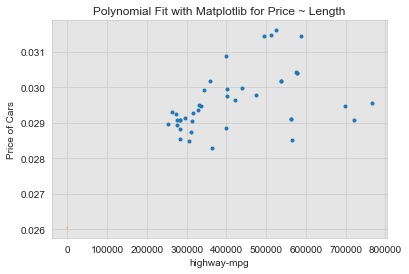

In [225]:
PlotPolly(p, x, y, 'highway-mpg')

In [227]:
np.polyfit(x, y, 3)

array([-1.43657666e-20,  1.67253381e-15,  1.10804306e-08,  2.60435639e-02])

            3             2
-1.437e-20 x + 1.673e-15 x + 1.108e-08 x + 0.02604


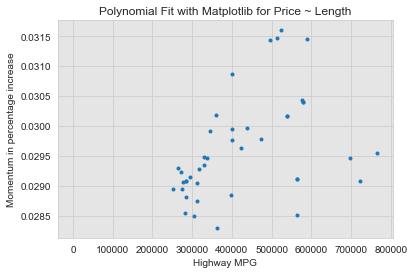

In [232]:
# Write your code below and press Shift+Enter to execute 
f1 = np.polyfit(x, y, 1.5)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Highway MPG')

In [233]:
new_df.head()

,Unnamed: 0,Postcode,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,...,doller,per_mo,label,label_10YearGrowth,Label_HousePrice,doller_value,Momentum_Growth,doller_Increase,label_Percentage10YearGrowth,10 Year Percentage Increase
Neighborhood,,,,,,,,,,,,,,,,,,,,,
"Clairle, Golden Mil, Oakridg",44,M1L,Scarborough,43.711112,-79.284577,3.0,Bakery,Bus Line,Park,Intersection,...,203.826,0.028296,Very Low Growth,Very Low Growth,Moderate,Moderate Increase,Very Low,Moderate,Very Low,110.0
Humber Summi,50,M9L,North York,43.756303,-79.565963,3.0,Empanada Restaurant,Pizza Place,Shopping Mall,Yoga Studio,...,172.128,0.028490,Very Low Growth,Very Low Growth,Low,Low Increase,Very Low,Low,Very Low,111.0
"Kingsway Park South Wes, Mimico N, The Queensway Wes, Royal York South Wes, South of Bloo",102,M8Z,Etobicoke,43.628841,-79.520999,3.0,Fast Food Restaurant,Hardware Store,Supplement Shop,Discount Store,...,315.401,0.028515,Very Low Growth,Very Low Growth,Very High,High Increase,Very Low,High,Very Low,111.5
Thorncliffe Par,29,M4H,East York,43.705369,-79.349372,0.0,Indian Restaurant,Yoga Studio,Bank,Grocery Store,...,161.461,0.028552,Very Low Growth,Very Low Growth,Very Low,Very Low Increase,Very Low,Very Low,Very Low,112.0
Scarborough Villag,32,M1J,Scarborough,43.744734,-79.239476,1.0,Playground,Yoga Studio,Donut Shop,Dessert Shop,...,177.213,0.028749,Very Low Growth,Very Low Growth,Low,Low Increase,Very Low,Low,Very Low,113.0


In [239]:
Z = new_df[['HousePrice','Latitude']]

In [240]:
lm.fit(Z, new_df['per_mo'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [241]:
Y_hat = lm.predict(Z)

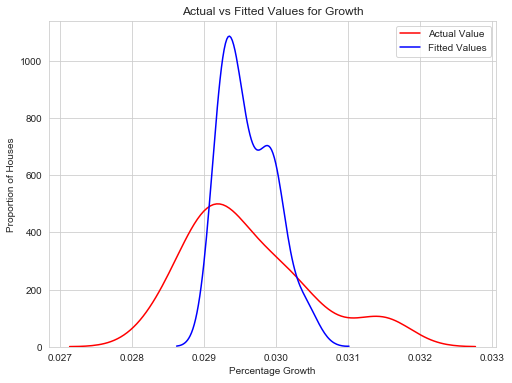

In [325]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(new_df['per_mo'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Growth')
plt.xlabel('Percentage Growth')
plt.ylabel('Proportion of Houses')

plt.show()
plt.close()

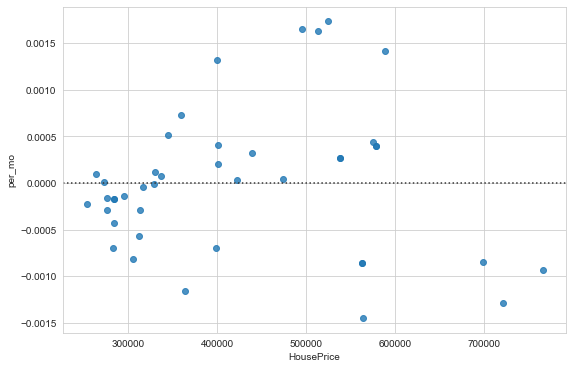

In [343]:
width = 9
height = 6
plt.figure(figsize=(width, height))
sns.residplot(new_df['HousePrice'], new_df['per_mo'])
plt.show()

In [326]:
from sklearn.preprocessing import PolynomialFeatures

In [327]:
x_train, x_test, y_train, y_test = train_test_split(new_df['HousePrice'], new_df['per_mo'], test_size=0.3, random_state=0)

In [329]:
pr = PolynomialFeatures(degree=6)
x_train_pr = pr.fit_transform(x_train.values.reshape(-1, 1))
x_test_pr = pr.fit_transform(x_test.values.reshape(-1, 1))
pr

PolynomialFeatures(degree=6, include_bias=True, interaction_only=False,
                   order='C')

In [330]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [331]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([0.02983442, 0.02998561, 0.02983451, 0.02911569, 0.02890258])

In [332]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [0.02983442 0.02998561 0.02983451 0.02911569]
True values: [0.0299555  0.03040378 0.02975776 0.02874938]


In [339]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    #plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


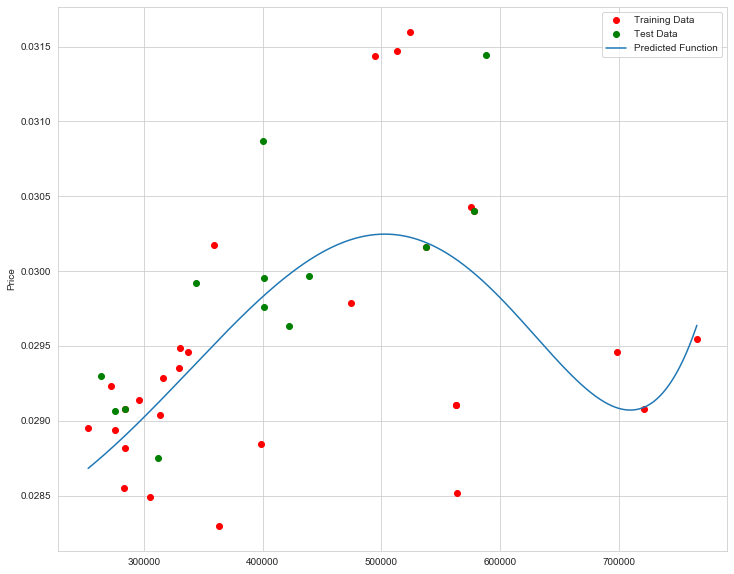

In [340]:
PollyPlot(x_train, x_test, y_train, y_test, poly,pr)

In [341]:
poly.score(x_train_pr, y_train)

0.3715186013395219

In [245]:
poly = LinearRegression()
poly.fit(new_df['HousePrice'], new_df['per_mo'])

ValueError: Expected 2D array, got 1D array instead:
array=[363636.36363636 305405.40540541 564150.86695835 283035.71428571
 311504.42477876 284070.79646018 398245.61403509 284347.82608696
 253043.47826087 275652.17391304 284347.82608696 275982.22459567
 313379.33103345 721182.43243243 295689.65517241 562931.03448276
 562931.03448276 272649.57264957 316239.31623932 329327.82848037
 263834.56468202 337288.13559322 698290.5982906  330252.10084034
 765811.96581197 422500.         474380.16528926 400826.44628099
 344262.29508197 438855.66985327 400813.00813008 537903.22580645
 537903.22580645 358761.4560475  575396.82539683 578174.6031746
 578174.6031746  400000.         494814.81481481 588148.14814815
 513333.33333333 524087.59124088].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

In [246]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [249]:
raw_venues = pd.read_csv('toronto_grouped.csv')

In [256]:
raw_venues.head()

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Adelaid, Kin, Richmon",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,...,0.0,0.02,0.0,0.0,0.0,0.0,0.01,0.0,0.01,0.0
1,Agincour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
2,"Agincourt Nort, L'Amoreaux Eas, Millike, Steel...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
3,"Albion Garden, Beaumond Height, Humbergat, Jam...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
4,"Alderwoo, Long Branc",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0


In [255]:
raw_venues.drop('Unnamed: 0',axis = 1, inplace = True)

In [251]:
new_df.head()

,Unnamed: 0,Postcode,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,...,doller,per_mo,label,label_10YearGrowth,Label_HousePrice,doller_value,Momentum_Growth,doller_Increase,label_Percentage10YearGrowth,10 Year Percentage Increase
Neighborhood,,,,,,,,,,,,,,,,,,,,,
"Clairle, Golden Mil, Oakridg",44,M1L,Scarborough,43.711112,-79.284577,3.0,Bakery,Bus Line,Park,Intersection,...,203.826,0.028296,Very Low Growth,Very Low Growth,Moderate,Moderate Increase,Very Low,Moderate,Very Low,110.0
Humber Summi,50,M9L,North York,43.756303,-79.565963,3.0,Empanada Restaurant,Pizza Place,Shopping Mall,Yoga Studio,...,172.128,0.028490,Very Low Growth,Very Low Growth,Low,Low Increase,Very Low,Low,Very Low,111.0
"Kingsway Park South Wes, Mimico N, The Queensway Wes, Royal York South Wes, South of Bloo",102,M8Z,Etobicoke,43.628841,-79.520999,3.0,Fast Food Restaurant,Hardware Store,Supplement Shop,Discount Store,...,315.401,0.028515,Very Low Growth,Very Low Growth,Very High,High Increase,Very Low,High,Very Low,111.5
Thorncliffe Par,29,M4H,East York,43.705369,-79.349372,0.0,Indian Restaurant,Yoga Studio,Bank,Grocery Store,...,161.461,0.028552,Very Low Growth,Very Low Growth,Very Low,Very Low Increase,Very Low,Very Low,Very Low,112.0
Scarborough Villag,32,M1J,Scarborough,43.744734,-79.239476,1.0,Playground,Yoga Studio,Donut Shop,Dessert Shop,...,177.213,0.028749,Very Low Growth,Very Low Growth,Low,Low Increase,Very Low,Low,Very Low,113.0


In [303]:
small_df = new_df.copy()[['HousePrice','Momentum_Growth']]

In [304]:
small_df.head()

,HousePrice,Momentum_Growth
Neighborhood,,
"Clairle, Golden Mil, Oakridg",363636.363636,Very Low
Humber Summi,305405.405405,Very Low
"Kingsway Park South Wes, Mimico N, The Queensway Wes, Royal York South Wes, South of Bloo",564150.866958,Very Low
Thorncliffe Par,283035.714286,Very Low
Scarborough Villag,311504.424779,Very Low


In [305]:
result = pd.merge(small_df, raw_venues, how='inner', on=['Neighborhood', 'Neighborhood'])

In [306]:
result.head()

,Neighborhood,HousePrice,Momentum_Growth,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Clairle, Golden Mil, Oakridg",363636.363636,Very Low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,Humber Summi,305405.405405,Very Low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,"Kingsway Park South Wes, Mimico N, The Queensw...",564150.866958,Very Low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.066667,0.0,0.000000
3,Thorncliffe Par,283035.714286,Very Low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.000000,0.0,0.052632
4,Scarborough Villag,311504.424779,Very Low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [308]:
Y = result['Momentum_Growth']

In [311]:
X = result.drop(['Neighborhood','Momentum_Growth'], axis = 1).values
X

array([[3.63636364e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.05405405e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.64150867e+05, 0.00000000e+00, 0.00000000e+00, ...,
        6.66666667e-02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.88148148e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.13333333e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.24087591e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [286]:
X = X.values

In [292]:
X

array([[3.63636364e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.05405405e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.64150867e+05, 0.00000000e+00, 0.00000000e+00, ...,
        6.66666667e-02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.88148148e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.13333333e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.24087591e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [293]:
from sklearn.model_selection import train_test_split

In [312]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

In [313]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [314]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [315]:
predTree = drugTree.predict(X_testset)

In [316]:
print (predTree [0:5])
print (y_testset [0:5])


['High' 'High' 'High' 'High' 'Very High']
30         High
40    Very High
26         High
25         High
6      Very Low
Name: Momentum_Growth, dtype: category
Categories (5, object): [Very Low < Low < Moderate < High < Very High]


In [317]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.38461538461538464


!conda install -c conda-forge pydotplus -y

!conda install -c conda-forge python-graphviz -y

In [322]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [323]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = resulted[1:]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

NameError: name 'my_data' is not defined

In [344]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [345]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [356]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset) 

C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [357]:
SVM_pred = clf.predict(X_testset)

In [358]:
from sklearn.metrics import jaccard_similarity_score
svmJAC=jaccard_similarity_score(y_testset, SVM_pred)

C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [359]:
from sklearn.metrics import f1_score
SVMf1=f1_score(y_testset, SVM_pred, average='weighted')

C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [360]:
svmJAC

0.07692307692307693

In [361]:
SVMf1

0.12820512820512822

# KNN prediction

In [363]:
from sklearn.neighbors import KNeighborsClassifier

In [364]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)

In [365]:
KNN_pred = neigh.predict(X_testset)

In [366]:
from sklearn.metrics import jaccard_similarity_score
KNNjac=jaccard_similarity_score(y_testset, KNN_pred)

C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [367]:
from sklearn.metrics import f1_score
KNNf1=f1_score(y_testset, KNN_pred, average='weighted') 

C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Decision Tree prediction

In [369]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [370]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [371]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [380]:
predTree = drugTree.predict(X_testset)

In [373]:
from sklearn.metrics import jaccard_similarity_score
DTjac = jaccard_similarity_score(y_testset, predTree)

C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [374]:
from sklearn.metrics import f1_score
DTf1=f1_score(y_testset, predTree, average='weighted')

C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Support Vector Machine

In [375]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [376]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset) 

C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [378]:
SVM_pred = clf.predict(X_testset)

In [379]:
from sklearn.metrics import jaccard_similarity_score
svmJAC=jaccard_similarity_score(y_testset, SVM_pred)

C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [381]:
from sklearn.metrics import f1_score
SVMf1=f1_score(y_testset, SVM_pred, average='weighted')

C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Logistic Regression

In [383]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LR

C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [384]:
LR_pred= LR.predict(X_testset)

In [385]:
from sklearn.metrics import jaccard_similarity_score
LRjac=jaccard_similarity_score(y_testset, LR_pred)

C:\Users\Jonathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [388]:
RepDict = [['KNN',KNNjac,KNNf1,'NA'],['Decision Tree',DTjac,DTf1,'NA'],['SVM',svmJAC,SVMf1,'NA'],['LogisticRegression',LRjac,LRjac,LRjac]]

In [389]:
results_df = pd.DataFrame(RepDict, columns = ['Algorithm', 'Jaccard','F1-score','LogLoss']) 

In [390]:
results_df.head()

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.384615,0.348718,NA
1,Decision Tree,0.384615,0.356643,NA
2,SVM,0.076923,0.128205,NA
3,LogisticRegression,0.153846,0.153846,0.153846
